<a href="https://colab.research.google.com/github/annefrancine/Time-series/blob/master/Air_Passengers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

In [0]:
#pd.show_versions()

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [4]:
#loading dataset
dateparse = lambda dates: pd.datetime.strptime(dates, '%Y-%m')
data = pd.read_csv("/content/drive/My Drive/curso series temporais (udemy)/Dados/AirPassengers.csv", parse_dates=['Month'], index_col='Month',date_parser=dateparse)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  """Entry point for launching an IPython kernel.


In [5]:
data.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [6]:
data.index

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='Month', length=144, freq=None)

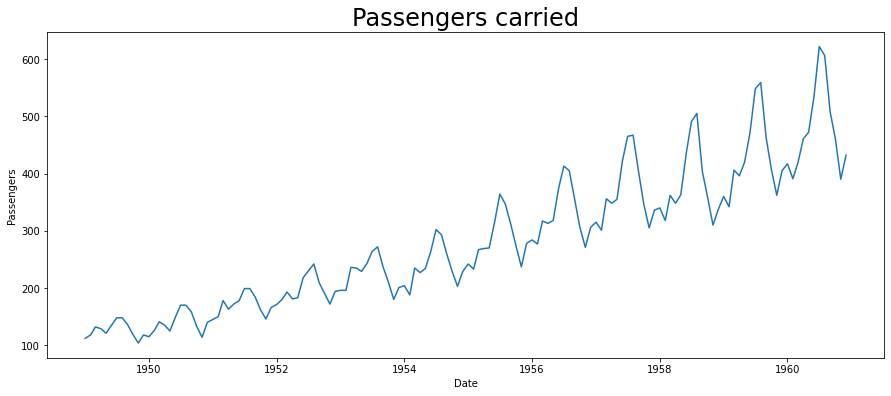

In [19]:
plt.plot(data)
plt.title('Passengers carried', fontsize=24)
plt.ylabel('Passengers')
plt.xlabel('Date')
plt.show();

# Forecast with moving averages

In [8]:
optimal_n = None

best_mse = None

db = data[['#Passengers']].values.astype('float32')

mean_results_for_all_possible_n_values = np.zeros(int(len(db) / 2 - 2))


for n in range(3, int(len(db) / 2 + 1)):
    mean_for_n = np.zeros(len(db) - n)
    for i in range(0, len(db) - n):
        mean_for_n[i] = np.power(np.mean(db[:, 0][i:i+n]) - db[i + n][0], 2)
    mean_results_for_all_possible_n_values[n - 3] = np.mean(mean_for_n)
optimal_n = np.argmin(mean_results_for_all_possible_n_values) + 3
best_mse = np.min(mean_results_for_all_possible_n_values)


print("MSE = %s" % mean_results_for_all_possible_n_values)
print("best MSE = %s" % best_mse)
print("great n = %s" % optimal_n)

MSE = [ 2339.63356126  2764.88660714  3012.10128709  3151.45469085
  3227.18632274  3256.56100643  3186.6614532   3011.60186946
  2743.00652782  2472.34091928  2354.71361401  2403.15665424
  2555.64628844  2755.90582275  2957.73325883  3148.95678109
  3318.74202065  3471.20655414  3579.85735927  3632.1383133
  3621.28446048  3590.00382793  3614.46072399  3714.23057056
  3856.30383806  4039.07639445  4228.22951927  4417.98332931
  4590.62775569  4759.11651611  4915.97544876  5048.63704665
  5147.82094512  5226.01903743  5334.33177783  5486.37155691
  5665.83581156  5879.92290769  6108.05805477  6311.94563847
  6507.04778972  6685.18398409  6897.90877682  7105.06745207
  7299.11089319  7470.66004841  7664.68188379  7894.86749032
  8104.34268864  8337.10501668  8595.05628641  8844.55092457
  9063.90415815  9272.33339998  9544.40100932  9837.04023888
 10135.60331142 10420.20548681 10725.07181564 11069.94461765
 11393.32528446 11748.71711731 12111.18046458 12433.46474122
 12664.11747454 129

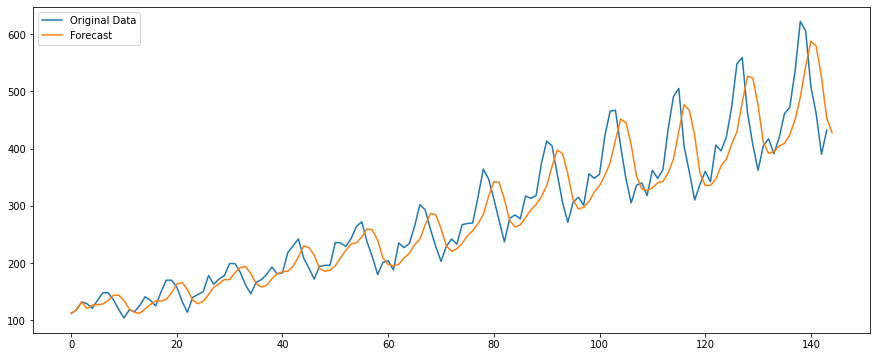

In [20]:
forecast = np.zeros(len(db) + 1)
for i in range(0, optimal_n):
    forecast[i] = db[i][0]
for i in range(0, len(db) - optimal_n + 1):
        forecast[i+optimal_n] = np.mean(db[:, 0][i:i+optimal_n])
plt.plot(db[:, 0],label = 'Original Data')
plt.plot(forecast, label = 'Forecast')
plt.legend()
plt.show()

# Decomposition

In [10]:
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  """Entry point for launching an IPython kernel.


Multiplicative

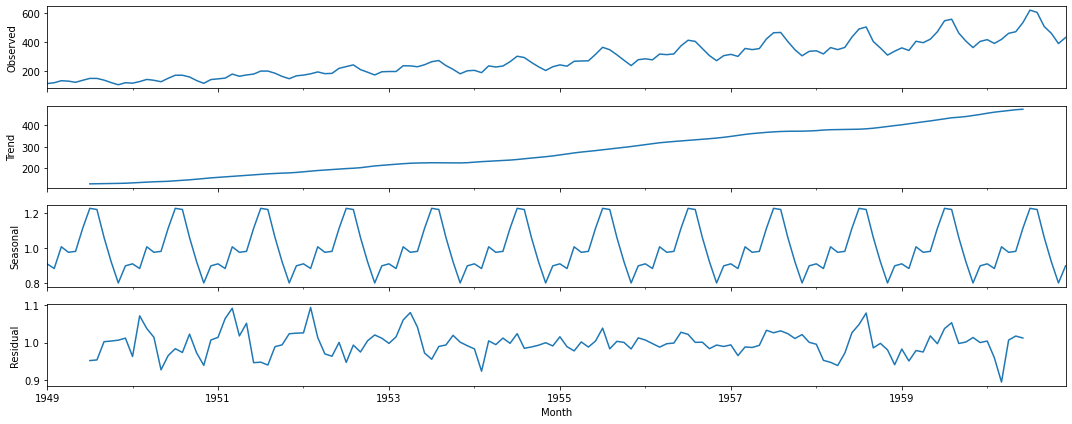

In [26]:
result = seasonal_decompose(data, model='multiplicative')
result.plot()
plt.show()

Aditive

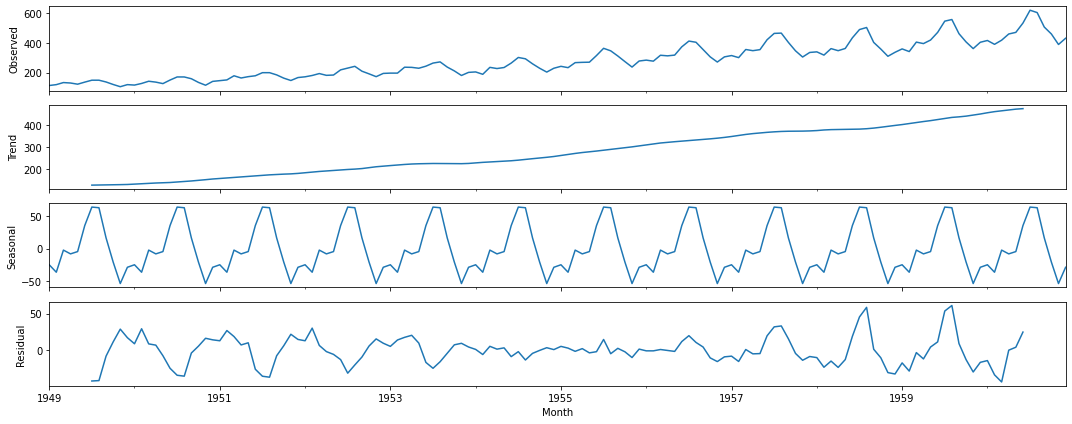

In [23]:
result2 = seasonal_decompose(data, model='aditive')
result2.plot()
plt.show()

# Stationary Time Series

In [0]:
from statsmodels.tsa.stattools import adfuller

In [15]:
X = data['#Passengers']
result = adfuller(X)
result
print('Statistic: %f' % result[0])
print('P value: %f' % result[1])
print('Critical values:')
for key, value in result[4].items():
   print('\t%s: %.3f' % (key, value))

Statistic: 0.815369
P value: 0.991880
Critical values:
	1%: -3.482
	5%: -2.884
	10%: -2.579


# Log transforms 

In [0]:
d_log=np.log(data) ## take log

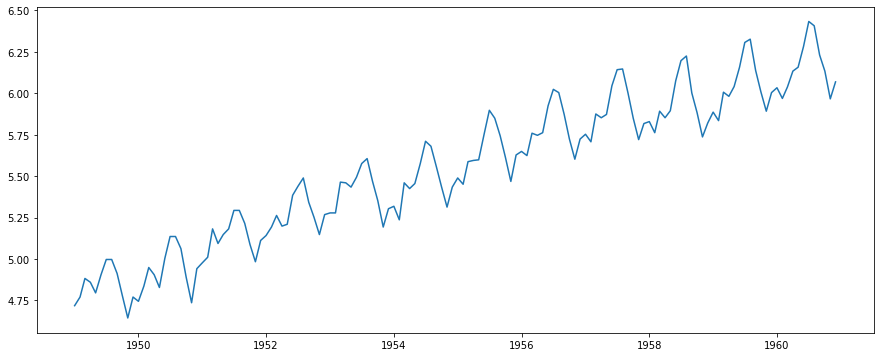

In [24]:
plt.plot(d_log);

# Differencing
Differencing can help stabilise the mean of a time series by removing changes in the level of a time series, and therefore eliminating (or reducing) trend and seasonality.
https://otexts.com/fpp2/stationarity.html

In [0]:
y = data['#Passengers']

In [0]:
def adf_test(y):
    # perform Augmented Dickey Fuller test
    print(' Dickey-Fuller Test :')
    dftest = adfuller(y, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test', 'p values', '# de lags', '# n;Observations'])
    for key, value in dftest[4].items():
        dfoutput['critical value ({})'.format(key)] = value
    print(dfoutput)

In [31]:
adf_test(y)

 Dickey-Fuller Test :
Test                      0.815369
p values                  0.991880
# de lags                13.000000
# n;Observations        130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [0]:
# defferencing 1 level
y_diff = np.diff(y)

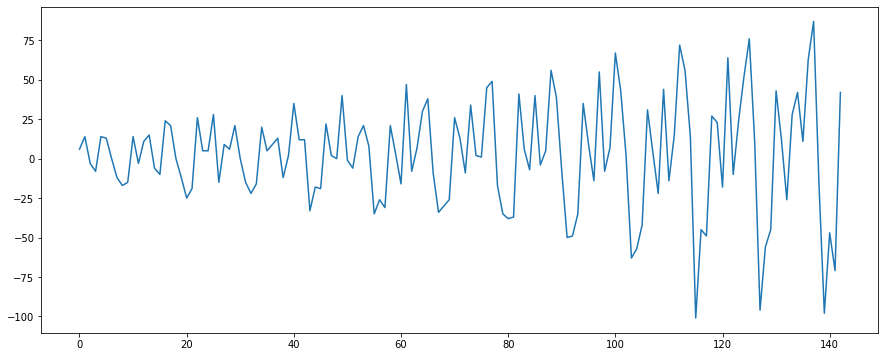

In [34]:
plt.plot(y_diff);


In [35]:
adf_test(y_diff)

 Dickey-Fuller Test :
Test                     -2.829267
p values                  0.054213
# de lags                12.000000
# n;Observations        130.000000
critical value (1%)      -3.481682
critical value (5%)      -2.884042
critical value (10%)     -2.578770
dtype: float64


In [0]:
# differencing 2 level
y_diff2 = np.diff(y_diff)

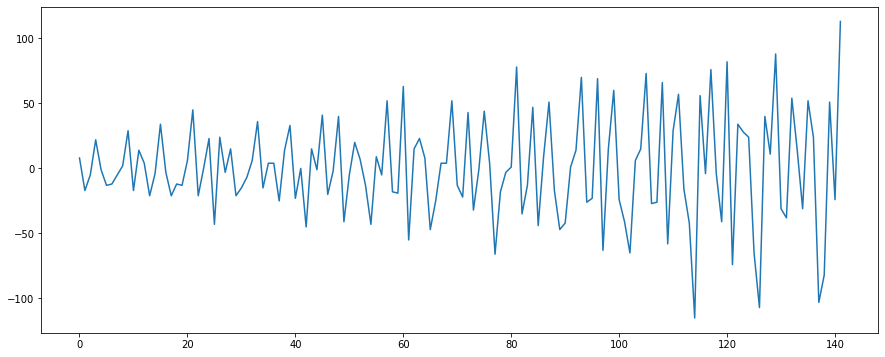

In [38]:
plt.plot(y_diff2);

In [39]:
adf_test(y_diff2)

 Dickey-Fuller Test :
Test                   -1.638423e+01
p values                2.732892e-29
# de lags               1.100000e+01
# n;Observations        1.300000e+02
critical value (1%)    -3.481682e+00
critical value (5%)    -2.884042e+00
critical value (10%)   -2.578770e+00
dtype: float64


#  log differencing

In [40]:
rolmean  = data.rolling(window=12).mean() #12 meses
rolstd = data.rolling(window=12).std()
print(rolmean)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01   463.333333
1960-09-01   467.083333
1960-10-01   471.583333
1960-11-01   473.916667
1960-12-01   476.166667

[144 rows x 1 columns]


In [41]:
print(rolstd)

            #Passengers
Month                  
1949-01-01          NaN
1949-02-01          NaN
1949-03-01          NaN
1949-04-01          NaN
1949-05-01          NaN
...                 ...
1960-08-01    83.630500
1960-09-01    84.617276
1960-10-01    82.541954
1960-11-01    79.502382
1960-12-01    77.737125

[144 rows x 1 columns]


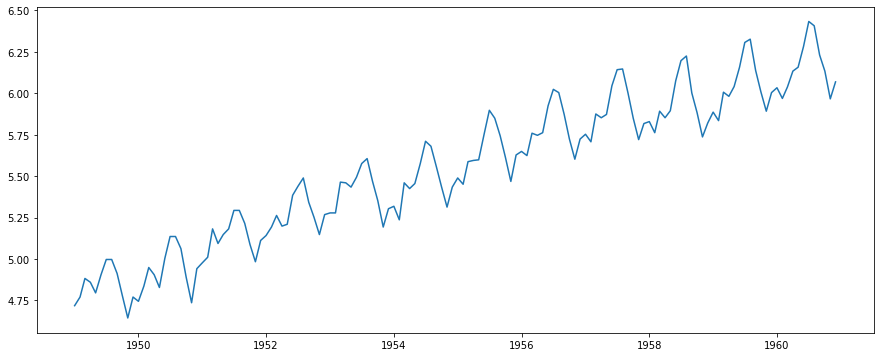

In [43]:
indexedDataset_logScale = np.log(data)
plt.plot(indexedDataset_logScale);

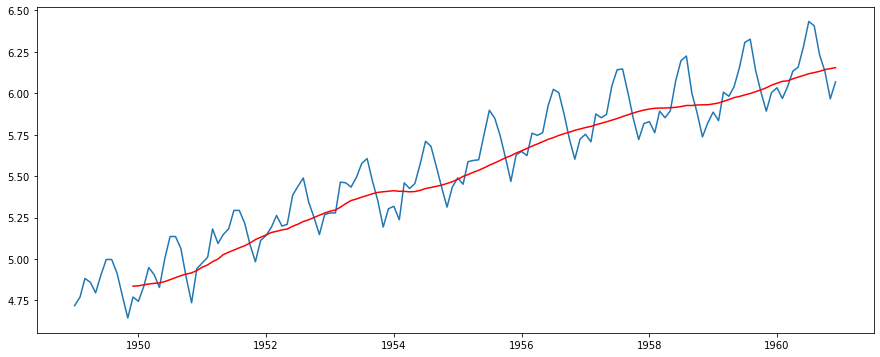

In [45]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
plt.plot(indexedDataset_logScale)
plt.plot(movingAverage, color='red');

In [46]:
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

,#Passengers
Month,
1949-01-01,NaN
1949-02-01,NaN
1949-03-01,NaN
1949-04-01,NaN
1949-05-01,NaN
1949-06-01,NaN
1949-07-01,NaN
1949-08-01,NaN
1949-09-01,NaN


In [47]:
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,#Passengers
Month,
1949-12-01,-0.065494
1950-01-01,-0.093449
1950-02-01,-0.007566
1950-03-01,0.099416
1950-04-01,0.052142
1950-05-01,-0.027529
1950-06-01,0.139881
1950-07-01,0.260184
1950-08-01,0.248635


In [0]:
from statsmodels.tsa.stattools import adfuller

In [0]:
#teste de estacionariedade, este é diferente porque vai plotar os resultados
def test_stationarity(timeseries):
    #estatisticas moveis
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #imprime estatisticas moveis
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Moving average')
    std = plt.plot(movingSTD, color='black', label = 'standard deviation ')
    plt.legend(loc='best')
    plt.title('moving average and standard deviation')
    plt.show(block=False)
    
    #Dickey-Fuller Test
    print(' Test de Dickey-Fuller:')
    dftest = adfuller(timeseries['#Passengers'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Statistical hypothesis testing', 'p value', '# ranges', '# observations'])
    for key, value in dftest[4].items():
        dfoutput['critical value({})'.format(key)] = value
    print(dfoutput)     

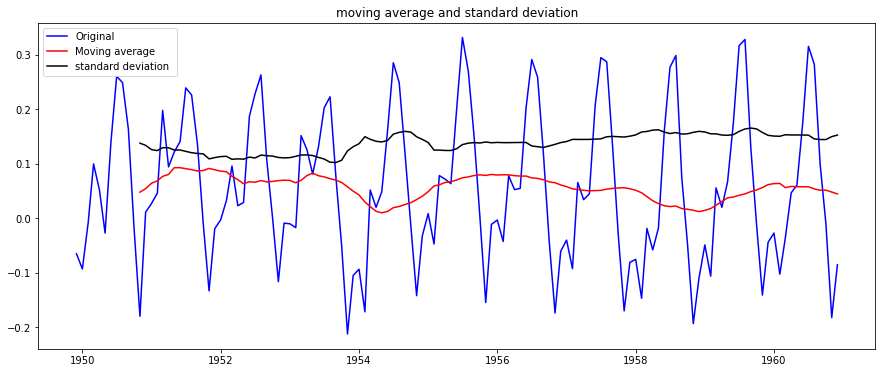

 Test de Dickey-Fuller:
Statistical hypothesis testing     -3.162908
p value                             0.022235
# ranges                           13.000000
# observations                    119.000000
critical value(1%)                 -3.486535
critical value(5%)                 -2.886151
critical value(10%)                -2.579896
dtype: float64


In [53]:
test_stationarity(datasetLogScaleMinusMovingAverage)

# Removing the trend with regression

In [0]:
X = [i for i in range(0,len(data))]
X = np.reshape( X, (len(X),1))
y = data.values

In [0]:
from sklearn.linear_model import LinearRegression

In [56]:
model = LinearRegression()
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
trend = model.predict(X)

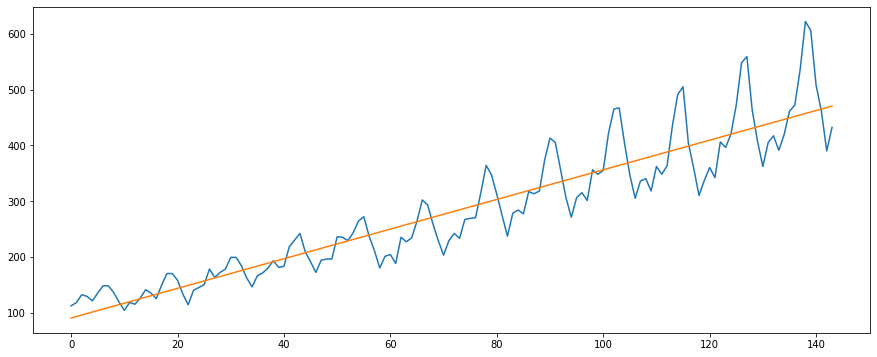

In [58]:
plt.plot(y)
plt.plot(trend)
plt.show()

In [0]:
detrended = [y[i]-trend[i] for i in range(0, len(data))]

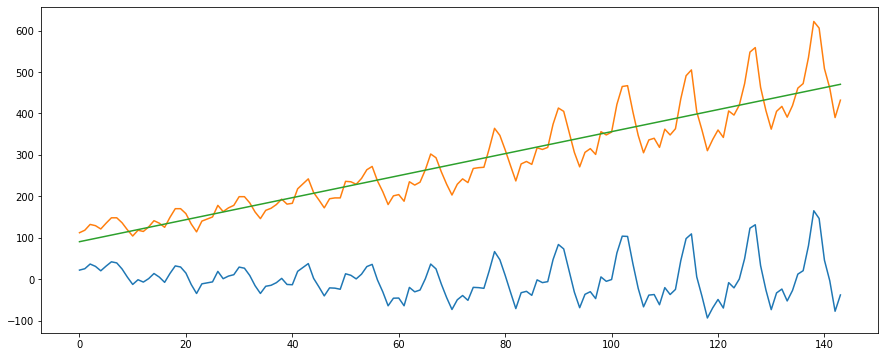

In [60]:
# plot detrended
plt.plot(detrended)
plt.plot(y)
plt.plot(trend)
plt.show()